In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

In [149]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [150]:
import platform
platform.system()

'Windows'

In [151]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# LSTM 예제

In [156]:
import statsmodels.api as sm

In [160]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


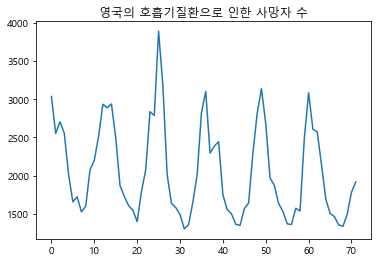

In [161]:
#df.value = df.value.map(lambda x : (x - df.value.mean()) / np.std(df.value))
df.value.plot()
plt.title("영국의 호흡기질환으로 인한 사망자 수")
plt.show()

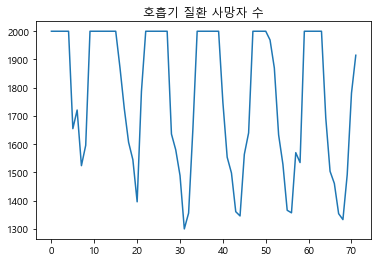

In [164]:
df["cliped_value"] = df.value.clip(upper = 2000)
df.cliped_value.plot()
plt.title("호흡기 질환 사망자 수")
plt.show()

In [165]:
model_ARMA = sm.tsa.ARMA(df["cliped_value"], (1,2))
result_ARMA = model_ARMA.fit()
print(result_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:           cliped_value   No. Observations:                   72
Model:                     ARMA(1, 2)   Log Likelihood                -460.457
Method:                       css-mle   S.D. of innovations            143.769
Date:                Mon, 21 Sep 2020   AIC                            930.915
Time:                        12:22:45   BIC                            942.298
Sample:                             0   HQIC                           935.447
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1782.0366     64.334     27.700      0.000    1655.944    1908.129
ar.L1.cliped_value     0.5829      0.130      4.496      0.000       0.329       0.837
ma.L1.cliped_value  

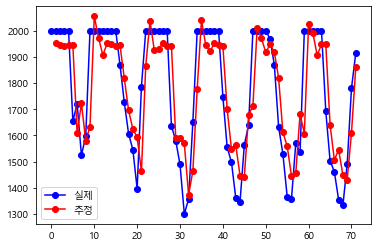

In [166]:
plt.plot(df["cliped_value"], "bo-", label="실제")
plt.plot(result_ARMA.predict(1), "ro-", label="추정")
plt.legend()
plt.show()

In [196]:
ts = 7

df["cliped_std_value"] = df.cliped_value.map(lambda x : (x - df.cliped_value.mean()) / np.std(df.cliped_value))
X_train = np.asarray([np.array([df.cliped_std_value.values[i+j] for j in range(ts)])
                      for i in range(len(df.cliped_std_value) - ts)]).reshape(-1,ts,1)
y_train = df.cliped_std_value.values[ts:]
X_train.shape, y_train.shape

((65, 7, 1), (65,))

In [201]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, input_shape=(ts, 1)))
model_RNN.add(Dense(1, activation="linear"))
model_RNN.compile(loss='mse', optimizer='adam')

In [202]:
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


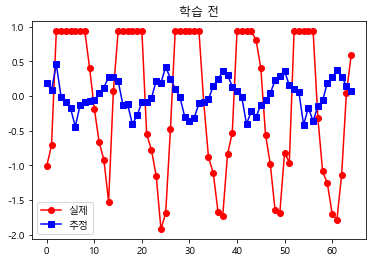

In [203]:
plt.plot(y_train[:], 'ro-', label="실제")
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 전")
plt.show()

In [204]:
history_RNN = model_RNN.fit(X_train, y_train, epochs=1000,verbose=0)

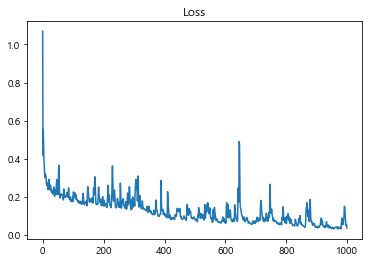

In [205]:
plt.plot(history_RNN.history["loss"])
plt.title("Loss")
plt.show()

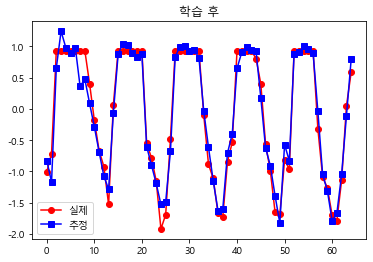

In [206]:
plt.plot(y_train[:], 'ro-', label="실제")
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 후")
plt.show()

In [207]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation="linear"))
model_LSTM.compile(loss='mse', optimizer='adam')

In [208]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


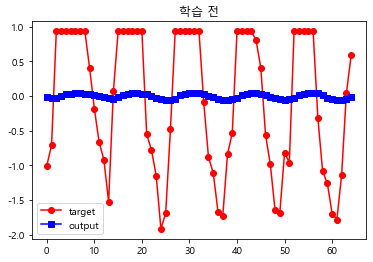

In [209]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 전")
plt.show()

In [210]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000,verbose=0)

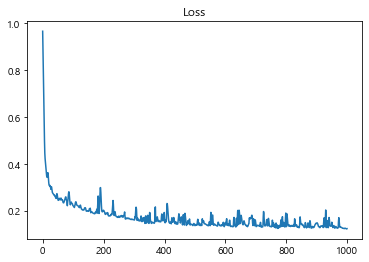

In [211]:
plt.plot(history_LSTM.history["loss"])
plt.title("Loss")
plt.show()

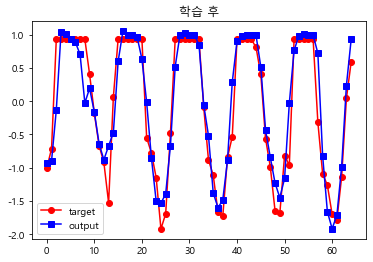

In [212]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 후")
plt.show()

# 2020년 시청률 예측

In [152]:
os.chdir('C:/Users/82109/Desktop')

In [3]:
test = pd.read_excel('test202006.xlsx')
# dates = pd.date_range('2020-01-01', periods=48, freq='M')

In [215]:
df_rating = pd.read_excel('시청률데이터.xlsx')

In [216]:
# 양쪽 맨 끝에 있는 평균값 제거하기
df_rating = df_rating.iloc[:1440]
df_rating = df_rating.iloc[:,:-1]
df_rating.set_index('시간대',inplace = True)
df_rating

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [217]:
date = []
rating = []
for day in df_rating.columns:
    for time in df_rating.index:
        date.append('{} {}'.format(day,time))
        rating.append(df_rating.loc[time,day])
        
df_time = pd.DataFrame({'date':date,'rating':rating})
df_time

,date,rating
0,2019-01-01 02:00,0.0
1,2019-01-01 02:01,0.0
2,2019-01-01 02:02,0.0
3,2019-01-01 02:03,0.0
4,2019-01-01 02:04,0.0
...,...,...
525595,2019-12-31 01:55,0.0
525596,2019-12-31 01:56,0.0
525597,2019-12-31 01:57,0.0
525598,2019-12-31 01:58,0.0


In [218]:
df_time = df_time[df_time.rating !=0]
df_time

,date,rating
9,2019-01-01 02:09,0.014
100,2019-01-01 03:40,0.014
101,2019-01-01 03:41,0.011
102,2019-01-01 03:42,0.011
103,2019-01-01 03:43,0.011
...,...,...
525497,2019-12-31 00:17,0.024
525498,2019-12-31 00:18,0.050
525499,2019-12-31 00:19,0.050
525500,2019-12-31 00:20,0.024


In [219]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111817 entries, 9 to 525501
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    111817 non-null  object 
 1   rating  111817 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.6+ MB


In [220]:
from datetime import datetime,timedelta
from math import ceil
from dateutil.parser import parse

In [221]:
def ys(date):
    if date[-5:]<'02:00':
        return datetime.strptime(date,'%Y-%m-%d %H:%M') + timedelta(days=1)
    else:
        return datetime.strptime(date,'%Y-%m-%d %H:%M')
df_time.date = df_time.date.apply(ys)

C:\Users\82109\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [222]:
df_time

,date,rating
9,2019-01-01 02:09:00,0.014
100,2019-01-01 03:40:00,0.014
101,2019-01-01 03:41:00,0.011
102,2019-01-01 03:42:00,0.011
103,2019-01-01 03:43:00,0.011
...,...,...
525497,2020-01-01 00:17:00,0.024
525498,2020-01-01 00:18:00,0.050
525499,2020-01-01 00:19:00,0.050
525500,2020-01-01 00:20:00,0.024


In [223]:
df_time = df_time.astype({'date':'datetime64[ns]'})
df_time.set_index('date',inplace = True)

In [224]:
rating_20m_mean = pd.DataFrame(df_time.rating.resample('20T').mean())
rating_20m_mean.fillna(0,inplace = True)
rating_20m_mean

,rating
date,
2019-01-01 02:00:00,0.01400
2019-01-01 02:20:00,0.00000
2019-01-01 02:40:00,0.00000
2019-01-01 03:00:00,0.00000
2019-01-01 03:20:00,0.00000
...,...
2019-12-31 23:00:00,0.01350
2019-12-31 23:20:00,0.00000
2019-12-31 23:40:00,0.02575


In [225]:
train_idx = rating_20m_mean[rating_20m_mean.index < '2019-11-01 02:00'].index
train = rating_20m_mean.loc[train_idx]
train

,rating
date,
2019-01-01 02:00:00,0.014000
2019-01-01 02:20:00,0.000000
2019-01-01 02:40:00,0.000000
2019-01-01 03:00:00,0.000000
2019-01-01 03:20:00,0.000000
...,...
2019-11-01 00:20:00,0.020737
2019-11-01 00:40:00,0.018364
2019-11-01 01:00:00,0.008800


In [226]:
test_idx = rating_20m_mean[rating_20m_mean.index >= '2019-11-01 02:00'].index
test = rating_20m_mean.loc[test_idx]
test

,rating
date,
2019-11-01 02:00:00,0.00000
2019-11-01 02:20:00,0.00000
2019-11-01 02:40:00,0.00000
2019-11-01 03:00:00,0.00000
2019-11-01 03:20:00,0.00000
...,...
2019-12-31 23:00:00,0.01350
2019-12-31 23:20:00,0.00000
2019-12-31 23:40:00,0.02575


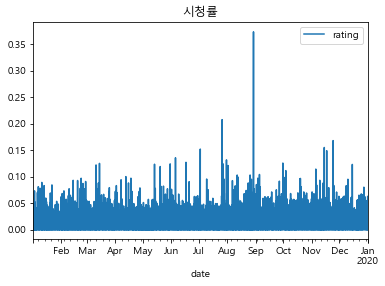

In [227]:
rating_20m_mean.plot()
plt.title("시청률")
plt.show()

In [230]:
rating_20m_mean

,rating
date,
2019-01-01 02:00:00,0.01400
2019-01-01 02:20:00,0.00000
2019-01-01 02:40:00,0.00000
2019-01-01 03:00:00,0.00000
2019-01-01 03:20:00,0.00000
...,...
2019-12-31 23:00:00,0.01350
2019-12-31 23:20:00,0.00000
2019-12-31 23:40:00,0.02575


In [231]:
ts = 7

rating_20m_mean["rating_std_value"] = (rating_20m_mean['rating'] -rating_20m_mean['rating'].mean()) /rating_20m_mean['rating'].std()
X_train = np.asarray([np.array([rating_20m_mean.rating_std_value.values[i+j] for j in range(ts)])
                      for i in range(len(rating_20m_mean.rating_std_value) - ts)]).reshape(-1,ts,1)
y_train = rating_20m_mean.rating_std_value.values[ts:]
X_train.shape, y_train.shape

((26269, 7, 1), (26269,))

In [232]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation="linear"))
model_LSTM.compile(loss='mse', optimizer='adam')

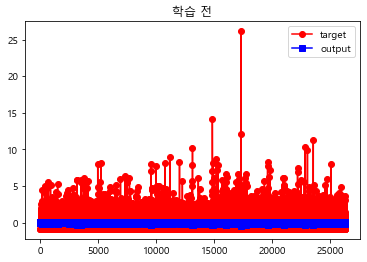

In [233]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 전")
plt.show()

In [235]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000,verbose=0)

In [ ]:
plt.plot(history_LSTM.history["loss"])
plt.title("Loss")
plt.show()

In [ ]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 후")
plt.show()